# Vacation Assignment

This assignment has two parts. 

In the first part you carry out some hypothesis tests; this is designed for you to practice both the process of running the different tests, and to make sure you understand the choices you are making when running tests.

The second part, 'revision', targets some Python syntax and (mainly) some concepts that I want to make sure everyone has securely grasped. The answers to all conceptual questions can be found in the lectures and reading; searching for them is good revision!

Overall, the idea of this assignment is to help you consolidate what you learned this term and it should prepare you well for the collection in January. Please remember that searching for the answers (in the lecture notes etc) and trying things til it works (for coding) is part of the learning process; you are *supposed* to need to do that rather than having all the answers at your fingertips.

<font color='red'>This can be distributed to students as a model answer but not until 1st week of HT please, as some tutors will set a hand-in deadline in 0th week (including me!)
    
<font color='red'>The exercises are quite long so please do feel free to give students the model answer rather than correcting each question part on their script as this will be very long winded for you as markers. You can then give some overall feedback/ detailed comments on any 'thoughtful' parts as think useful, or give verbal feedback
    
<font color='red'>Students should be able to complete all the 'revision' questions by revising the lectures and reading from the term. It will be more effective as revision if they need to find the answers by themselves, so I suggest leaving them to tackle these over the vacation.
    
<font color='red'>The data analysis questions recap the process for t-test, permutation test and rank-based test, with some 'thinking' questions thrown in. The student could make a start on these in the tutorial.

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Part 1 - data analysis exercises

In these questions you need to carry out various statistical tests. Please read the questions carefully and answer all parts - in particular if you are asked to *comment* on your results you must comment; this usually means interpret the results in plain English.

## Question 1 - Cloud seeding

**a)  Download the data file and load the data into a `Pandas` dataframe called `clouds`**

In [2]:
clouds = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/cloudSeeding.csv')

**b) Plot the data for seeded and unseeded clouds in a way that shows the distribution of rainfall yields**

<font color='red'>I chose a KDE plot to show the distribution (for example the long positive tail is clearly seen), and plotted individual data points as the sample is small; for example we can see that the long positive tail is based on just a couple of clouds in each case.

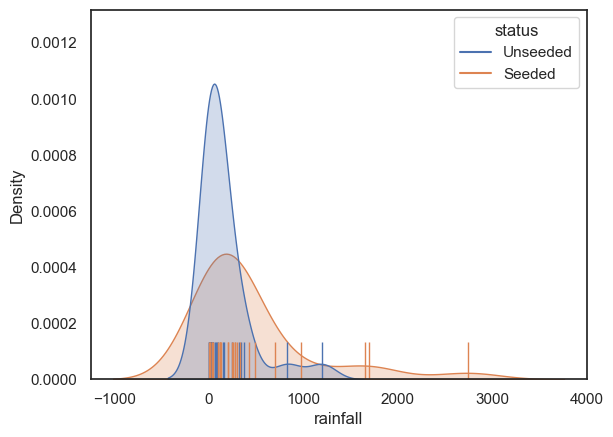

In [3]:
sns.kdeplot(data=clouds, x='rainfall', hue='status', fill=True)
sns.rugplot(data=clouds, x='rainfall', hue='status', height=0.1)
plt.show()

**c) Calculate the parameters of the best fitting Normal distributions for seeded and unseeded clouds respectively**

In [4]:
# Your code here
clouds.groupby('status').describe()

rainfall                                                             
            count        mean         std  min     25%    50%      75%     max
status                                                                        
Seeded       26.0  441.984615  650.787171  4.1  98.125  221.6  406.025  2745.6
Unseeded     26.0  164.588462  278.426404  1.0  24.825   44.2  159.200  1202.6

*State the parameters here*

<font color='red'>Your answer here
* <font color='red'>For seeded clouds, the mean is 442 mm and the sd is 651mm
* <font color='red'>For unseeded clouds, the mean is 164 mm and the sd is 278mm</font>

**d) Is a normal distribution a good fit to the data?**

*The here we overlay the best fitting normal on the data KDE plot:*

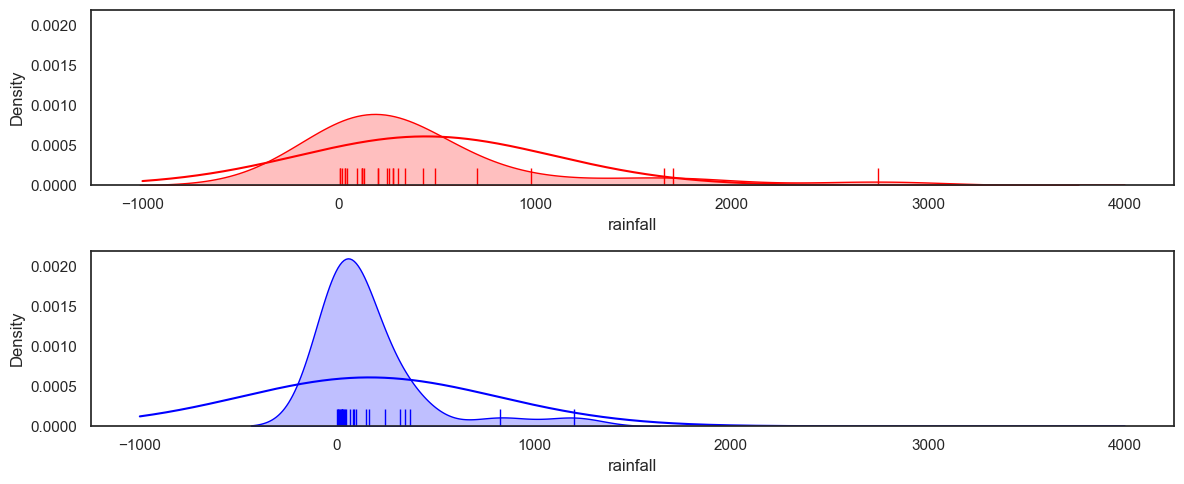

In [5]:
plt.figure(figsize=(12, 5))

seeded=clouds.query('status=="Seeded"').rainfall
unseeded=clouds.query('status=="Unseeded"').rainfall

# seeded clouds
plt.subplot(2,1,1)
x=range(-1000,4000)
y = stats.norm.pdf(x,seeded.mean(),seeded.std())
plt.plot(x,y,color=(1,0,0))
sns.kdeplot(data=seeded, color=[1,0,0], fill=True)
sns.rugplot(data=seeded, color=[1,0,0], height=0.1)
plt.ylim([0,0.0022])

# unseeded clouds
plt.subplot(2,1,2)
x=range(-1000,4000)
y = stats.norm.pdf(x,unseeded.mean(),seeded.std())
plt.plot(x,y,color=(0,0,1))
sns.kdeplot(data=unseeded, color=[0,0,1], fill=True)
sns.rugplot(data=unseeded, color=[0,0,1], height=0.1)
plt.ylim([0,0.0022])

plt.tight_layout()
plt.show()

*Based on the plot above, the data are not well fitted by a normal distribution. Comment on the what you can see in the graph that suggests the normal distribution is a poor fit.*

<font color='red'>Your answer here

<font color='red'>The mean of the fitted normal seems to fall above almost all the datapoints in each sample.

<font color='red'>The long tail of high rainfall events (positive skew) is not fitted by the normal which is necessarily symetrical

<font color='red'>The best fitting normal assigns a lot of probability mass to rainfall values below zero (to be fair the KDE plot also does this!)

**e) Conduct three statistical tests of the researcher’s hypothesis, based on:**

*I.	Assumption of normality*

*II.	Permutation*

*III.	Ranked values*

*… in each case you should:*
* State the null and alternative hypothesis and the alpha value
* Report appropriate descriptive statistics for the test in question
* Carry out the test
* State the results of the test including the test statistic and p value. For the t-test, degrees of freedom should also be stated.
* Report your practical conclusion in plain English



#### <font color='red'>I. Independent samples t-test

<font color='red'>$\mathcal{H_o}:$ There is no difference in mean rainfall between seeded and unseeded clouds

<font color='red'>$\mathcal{H_a}:$ The mean rainfall is higher for seeded clouds
    
<font color='red'>I will test at the 5% level, one tailed

In [6]:
# output the relevant descriptive statistics
clouds.groupby('status').agg({'rainfall':['mean', 'std', 'count']})

rainfall                  
                mean         std count
status                                
Seeded    441.984615  650.787171    26
Unseeded  164.588462  278.426404    26

<font color='red'> The mean rainfall is higher for seeded clouds (mean = 441.98 standard units, s.d. = 650.78) than for unseeded clouds (mean = 164.59 standard units, s.d. = 278.42) 

In [7]:
stats.ttest_ind(seeded,unseeded,alternative='greater')

TtestResult(statistic=1.9982446280649688, pvalue=0.025571601199239034, df=50.0)

<font color='red'>Rainfall was significantly higher for seeded clouds (t(50)=2.00, p=0.0256 one-tailed).

<font color='red'>We conclude that cloud seeding increases rainfall.

#### <font color='red'>II. Permutation test for difference of means (independent samples)

<font color='red'>$\mathcal{H_o}:$ There is no difference in mean rainfall between seeded and unseeded clouds

<font color='red'>$\mathcal{H_a}:$ The mean rainfall is higher for seeded clouds
    
<font color='red'>I will test at the 5% level, one tailed

In [8]:
# output the relevant descriptive statistics
clouds.groupby('status').agg({'rainfall':['mean', 'std', 'count']})

rainfall                  
                mean         std count
status                                
Seeded    441.984615  650.787171    26
Unseeded  164.588462  278.426404    26

<font color='red'>The mean rainfall is higher for seeded clouds (mean = 441.98 standard units, s.d. = 650.78) than for unseeded clouds (mean = 164.59 standard units, s.d. = 278.42) 

In [9]:
# define a function for difference of means in the suitalbe formmat for stats.permutation_test()
# note the difference between this function and mDiff for paired samples below!
def dMeans(x, y):
    return np.mean(x)-np.mean(y)

stats.permutation_test((seeded,unseeded),dMeans,permutation_type='independent',alternative='greater')

PermutationTestResult(statistic=277.3961538461539, pvalue=0.0234, null_distribution=array([-64.13461538,  96.08076923,  88.50384615, ..., 199.07307692,
       -78.71153846,  72.70384615]))

<font color='red'>Rainfall was significantly higher for seeded clouds (difference of means = 277.40, df = 50, p=0.0206 one-tailed).

<font color='red'>We conclude that cloud seeding increases rainfall.

<font color='red'>Note - the degrees of freedom for this test are 50 (52 datapoints - 2 estimated means for each shuffle; However I don't necessarily expect students to work this out as I haven't really explained it; it would be fine to just report sample sizes instead for the permutation test)

<font color='red'>III. Rank sum test

<font color='red'>$\mathcal{H_o}:$ There is no difference in median rainfall between seeded and unseeded clouds

<font color='red'>$\mathcal{H_a}:$ The median rainfall is higher for seeded clouds

<font color='red'>I will test at the 5% level, one tailed

In [10]:
# output the relevant descriptive statistics
clouds.groupby('status').quantile([0.25,0.5,0.75])

rainfall
status                 
Seeded   0.25    98.125
         0.50   221.600
         0.75   406.025
Unseeded 0.25    24.825
         0.50    44.200
         0.75   159.200

<font color='red'>The median rainfall is higher for seeded clouds (median = 221.60 standard units, q1=98.13, q3=406.03) than for unseeded clouds (median = 44.20 standard units, q1=24.825, q3=159.20) 

In [11]:
stats.mannwhitneyu(seeded,unseeded,alternative='greater')

MannwhitneyuResult(statistic=473.0, pvalue=0.0069156486351175175)

<font color='red'>A rank sum test shows that the median rainfall is significantly higher for seeded clouds (R=473.0, n1,n2=26, p=0.00692)

<font color='red'>We conclude that cloud seeding does indeed increase rainfall

<font color='red'>Note - I think students should report the sample sizes for rank based tests so that the reader knows how many data points the inference was based on, and also because the test statistic R is uninterpretable without the sample sizes; some stats packages convert the test statistic R to a Z score which would be nice but statsmodels doesn't do that.

**f) Comment on the relative merits of each possible choice of test for this dataset.**



<font color='red'> Your answer here
    
<font color='red'>I would choose the permutation test. The t-test is clearly not appropriate due to the non-normal data distribution. Ranking of the data downplays the role of the extreme rainfall events which, though rare, are of significant practical importance.

<font color='red'>Note - Students may prefer the rank sum test ot permutation, for example if they regard the extreme rainfall events as outliers not to be trusted. I am fine with that answer as long as coherently justified.

## Question 2: Colouring books

A researcher hypothesises that working on adult colouring books is particularly relaxing and will lower resting heart rate.

She measures resting heart rate after one hour of colouring and after one hour of reading a novel in the same participants. The data are provided in the file ColouringHeartRate.csv. These are made-up data.

Download the data file and load the data into a Pandas dataframe called heartRate:


In [12]:
heartRate = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/ColouringHeartRate.csv')
heartRate

,participantID,colouring,reading
0,a,62,71
1,b,66,71
2,c,61,69
3,d,68,61
4,e,74,75
5,f,62,71
6,g,68,77
7,h,62,72
8,i,55,62
9,j,59,65


**b) Plot the data and comment.**

<font color='red'> As the data are paired I will make a scatterplot; I plot the line x=y for reference

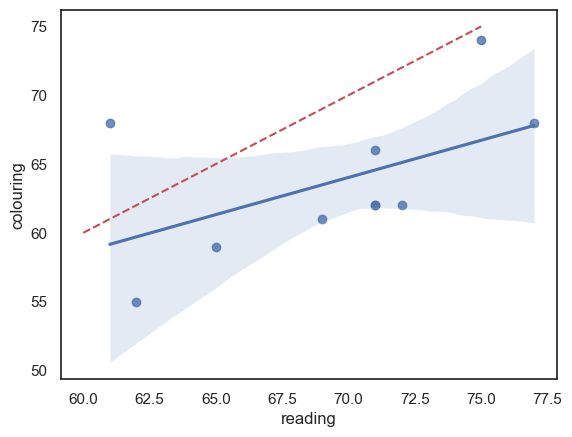

In [13]:
sns.regplot(data=heartRate, x='reading', y='colouring')
plt.plot([60,75],[60,75],'r--')
plt.show()

<font color='red'> Your comments here!
    
* <font color='red'>There appears to be a positive correlation (people with high heart rates in one condition also have high heart rates in the other condition)

* <font color='red'> Almost all the participants have a higher heart rate in the reading condition (points lie above the line x=y)

* <font color='red'> Those with the highest heart raates in the control condition (reading) show the bibggest fall in heart rate in the colouring condition - perhaps those withh low heart rate sin the control condition are subject to a floor effect (heart rate cannot fall much lower; thehy are already relaxed!)

* <font color='red'> There are not many data points!

**c)	This is a within-subjects or repeated-measures design. With reference to your graph, explain the advantages of a within-subjects design in this particular experiment.**

<font color='red'>A within subjects design is one in which each participant completes multiple conditions, so each person can be compared to themself across conditions. The advantage is that all interpersonal confounding variables are cancelled out. 

<font color='red'>In the current study, we see that there are large idividual differences in heart rate, meaning that people with high heart rate in the colouring condition also have a high heart rate in the reading condition; the change in heart rate between conditions is relatively small an could be dwarfed by these individual differences in a between-subjects design.

<font color='red'>A possible disadvantage is order effects - in the current example, if the colouring condition is always completed second, people could have a lower heart rate due to being more relaxed on the second visit to the lab.


**d) Control condition**

* Why do you think the researcher chose to compare heart rate after one hour of colouring to heart rate after one hour of reading, as opposed to comparing heart rate before and after colouring?*


<font color='red'>Your answer here

<font color='red'> To avoid order effects within a session - eg heart rate likely to be higher when the participant just arrived (from walking/cycling, plus possible nerves in the lab situation) than at the end of the session.

**e)	Conduct three statistical tests of the researcher’s hypothesis, based on** 

*I.	Assumption of normality*

*II.	Permutation*

*III.	Ranked values*

*… in each case you should:*

* State the null and alternative hypothesis and the alpha value
* Report appropriate descriptive statistics for the test in question
* Carry out the test
* State the results of the test including the test statistic and p value. For the t-test, degrees of freedom should also be stated.
* Report your practical conclusion in plain English


#### <font color='red'>I. Paired samples t-test

<font color='red'>$\mathcal{H_o}:$ There is no difference in mean heart rate between reading and colouring conditions

<font color='red'>$\mathcal{H_a}:$ The mean heartrate is lower in the colouring condition
    
<font color='red'>I will test at the 5% level, one tailed

In [14]:
# output the relevant descriptive statistics
heartRate.agg({'colouring':['mean', 'std', 'count'], 'reading':['mean', 'std', 'count']})

,colouring,reading
mean,63.700000,69.40000
std,5.396501,5.25357
count,10.000000,10.00000


<font color='red'>The mean heart rate is lower after colouring (mean = 67.3 bpm, s.d. = 5.40) than after reading (mean = 69.4 bpm, s.d. = 5.25) 

In [15]:
stats.ttest_rel(heartRate['reading'], heartRate['colouring'], alternative='greater')

TtestResult(statistic=3.4753513368432465, pvalue=0.0034947821057590726, df=9)

<font color='red'>A paired samples t-test showed that there was a significant difference such that heart rate was lower after colouring than reading (t(9)=3.48, p=0.00349)

<font color='red'>We conclude that colouring is a successful intervention to lower heart rate, compared to reading.

#### <font color='red'>II. Permutation test for difference of means: paired samples

<font color='red'>$\mathcal{H_o}:$ There is no difference in mean heart rate between reading and colouring conditions

<font color='red'>$\mathcal{H_a}:$ The mean heartrate is lower in the colouring condition
    
<font color='red'>I will test at the 5% level, one tailed

In [16]:
# output the relevant descriptive statistics
heartRate.agg({'colouring':['mean', 'std', 'count'], 'reading':['mean', 'std', 'count']})

,colouring,reading
mean,63.700000,69.40000
std,5.396501,5.25357
count,10.000000,10.00000


<font color='red'>The mean heart rate is lower after colouring (mean = 67.3 bpm, s.d. = 5.40) than after reading (mean = 69.4 bpm, s.d. = 5.25)


In [17]:
# note the difference between this function and dMeans for independent sammples above!)
def mDiff(x,y):
    return np.mean(x-y)

stats.permutation_test((heartRate.reading, heartRate.colouring), mDiff, permutation_type='samples', alternative='greater')

PermutationTestResult(statistic=5.7, pvalue=0.0078125, null_distribution=array([ 5.7,  4.5,  4.3, ..., -4.3, -4.5, -5.7]))

<font color='red'>A permutation test for paired samples showed a significant difference of means such that heart rate was lower after colouring than reading (mean difference in heart rate 5.7 bpm, p=0.0000781, df = 9).

<font color='red'>Note - the degrees of freedom for this test are 9 (10 pairs - 1 mean difference for each shuffle); However I don't necessarily expect students to work this out as I haven't really explained it; it would be fine to just report sample sizes instead for the permutation test). However students should be aware that the relevant sample size here for statistical purposes is 10 (number of pairs) not 20 (number of measurements).

#### <font color='red'>III. Sign rank test

<font color='red'>$\mathcal{H_o}:$ There is no difference in median heart rate between reading and colouring conditions

<font color='red'>$\mathcal{H_a}:$ The median heartrate is lower in the colouring condition
    
<font color='red'>I will test at the 5% level, one tailed

In [18]:
# output the relevant descriptive statistics
heartRate.quantile(q=[0.25,0.5,0.75], numeric_only=True)

,colouring,reading
0.25,61.25,66.00
0.50,62.00,71.00
0.75,67.50,71.75


<font color='red'>The median heart rate is lower after colouring (median = 62.00 bpm, q1=61.25, q3=67.50) than after reading (median = 71.0 bpm, q1=66.0, q3=71.75) 

In [19]:
stats.wilcoxon(heartRate['reading'],heartRate['colouring'],alternative='greater')

WilcoxonResult(statistic=50.5, pvalue=0.009765625)

<font color='red'>A sign rank test showed that heart rates were significantly lower after colouring than reading (T=50.5, p=0.00976, n=10 pairs).

<font color='red'>We conclude that colouring is effective in lowering heart, rate compared to reading.

**f) Assumption of normality**

*The use of the t-test rests on an assumption of normality. For a paired test, it is the **differences** that must be normally distributed for the t-test to be valid*

*Can you explain why it is the distribution of the differences, rather than the data, that is important?*

<font color='red'>Because we are testing if the differences are drawn from a normal distriubtion whose mean is greater than zero. In theory the data could be quite non-normal within each group (eg there is an outlier with high values in both x and y)) but the differences be Normal


*Let's check if the distribution of differences is normal:*

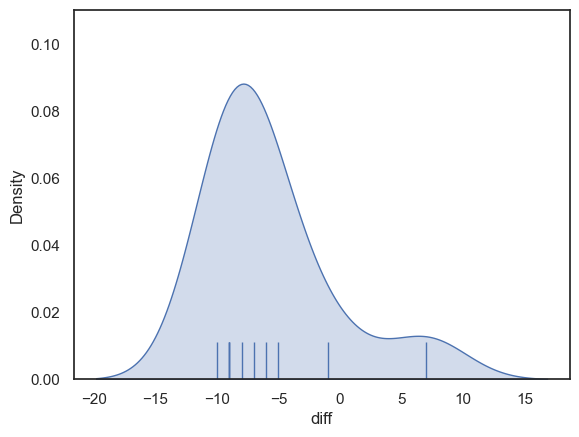

In [20]:
heartRate['diff']=heartRate.colouring-heartRate.reading
sns.kdeplot(heartRate['diff'], fill=True)
sns.rugplot(heartRate['diff'], height=0.1)
plt.show()

*It seems not - the differences have a distribution with positive skew (to be fair the sample size is too small to be really confident about this, but if unsure, it is better to avoid assuming normality)*

**g) Which statistical test do you think was the best choice for this dataset?**

<font color='red'>I would choose the permutation test.

<font color='red'>The t-test is not valid (assumption of normality not met as per my graph above; or even without the graph we could say that with a tiny sample size and no a priori reason to this the differences should be normal, we cannot assume normality)

<font color='red'>The sign rank test is less powerful than the permutation test as it uses less information

<font color='red'>Note - students may make another choice; for example they may prefer the sign rank test as there is one outlier difference; this is OK as long as there is a coherent justification. I am less keen on students choosing the t-test as with the small sample, and lack of a priori reason to this the data should be normal, the assumption of normality is hard to justify.

## Question 3: Reaction times

*Two participants, A and B, perform a choice reaction time task in which they must press one of two buttons depending on whether a word was a real or made-up word*

*The data are provided in the file ChoiceRTs.csv. These are made-up data*

*Download the data file and load the data into a Pandas dataframe called ChoiceRTs:*

In [21]:
ChoiceRTs = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/ChoiceRTs.csv')

**a) Plot the data**

*Plot the data for each participant in a way that illustrates the distribution of reaction times for each person and allows them to be compared. Two subplots within a single figure would be a good choice here.*

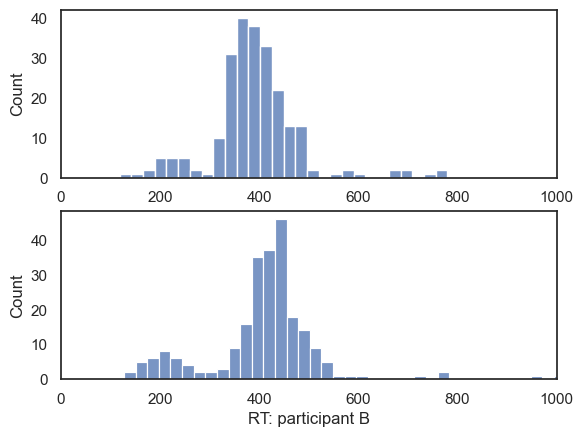

In [22]:
plt.subplot(2,1,1)
sns.histplot(data=ChoiceRTs, x='A')
plt.xlim([0,1000])
plt.xlabel('RT: participant A')

plt.subplot(2,1,2)
sns.histplot(data=ChoiceRTs, x='B')
plt.xlim([0,1000])
plt.xlabel('RT: participant B')

plt.tight_layout
plt.show()

<font color='red'>Note - two plots placed vertically allow for better comparison than horizontally
X axes ranges should match to allow for direct comparison of the distributions

<font color='red'>KDE plot would also be fine here

**c) Comment on the plot**


<font color='red'>Your answer here

<font color='red'>Both participants have a multimomdal distribution with the bulk of RTs grouped around 400 ms, but a smaller group of fast RTs (around 200ms) and a few slow RTs (>600 ms)

<font color='red'>Participant B seems to be slightly slower in the 'main' distribution of RTs aroung 400ms, and also has a higher number of very fast RTs.

**d) Data cleaning decision**

*The researcher decides that reaction times under 300ms (very fast responses) and over 700ms (very slow responses) should be excluded.*

*Do you think this is justified? Explain your answer.*

<font color='red'>Your answer here

<font color='red'>Yes, the RTs below 300ms clearly belong to a separate distribution from the bulk of RTs - maybe they represent false starts. The RTs above 700ms also seem to be outliers (maybe trials on which the participant missed seeing the cue)
    
<font color='red'>Sometimes students feel that no data should ever be excluded, because they are after all real datapoints and it is more honest to include everything. I would refer them back to the lecture on data wrangling; our job as researchers is to separate out data that measure the process of interest from 'bad' datapoints that reflect some other process. However, we could also note taht it is important to be trasparent about which data were included (running our analysis in Jupyter Notebooks is ideal for this as every step is recorded, unlike if we had manually remmoved cases from an Excel spreadsheet or similar!)

**e) Data cleaning implementation**

*Make a new dataframe called `ChoiceRTs_clean` with the data with RTs outside the range 300-700ms replaced by `NaN`*

In [23]:
# create a new dataframe with fast and slow RTs replaced by NaN
ChoiceRTs_clean = ChoiceRTs.copy()

ChoiceRTs_clean.loc[(ChoiceRTs_clean['A']<300),['A']]=np.nan
ChoiceRTs_clean.loc[(ChoiceRTs_clean['A']>700),['A']]=np.nan
ChoiceRTs_clean.loc[(ChoiceRTs_clean['B']<300),['B']]=np.nan
ChoiceRTs_clean.loc[(ChoiceRTs_clean['B']>700),['B']]=np.nan

# check it worked - min and max should now be 300,700 or nearby
ChoiceRTs_clean.describe()

,trialNumber,A,B
count,235.000000,208.000000,196.000000
mean,118.000000,401.752356,431.175663
std,67.982841,57.575202,49.184896
min,1.000000,310.290000,304.440000
25%,59.500000,364.915000,397.627500
50%,118.000000,393.430000,429.060000
75%,176.500000,427.362500,455.457500
max,235.000000,674.130000,615.340000


**f) Calculate the mean and sd of reaction time**

* before and 
* after excluding data outside the range 300-700 ms

*Comment on the difference in results*

In [24]:
# stats for original data
ChoiceRTs.agg({'A':['mean', 'std', 'count'],'B':['mean', 'std', 'count']})

,A,B
mean,391.915404,407.901106
std,92.417086,114.115202
count,235.000000,235.000000


In [25]:
# stats for cleaned data
ChoiceRTs_clean.agg({'A':['mean', 'std', 'count'],'B':['mean', 'std', 'count']})

,A,B
mean,401.752356,431.175663
std,57.575202,49.184896
count,208.000000,196.000000


**g) Statistical test**

*In each case:*

i)	all the data

ii) the data with RTs outside the range 300-700ms excluded

*conduct a permutation test to determine whether there is a difference in the mean reaction time between the two participants*

**HINT you will need to replace the function `np.mean()` with `np.nanmean()` as np.mean() returns a NaN if any of the values being averaged are NaN**

In [26]:
# all the data
def dMeans(x,y):
    return np.nanmean(x)-np.nanmean(y)

stats.permutation_test((ChoiceRTs.A, ChoiceRTs.B), dMeans, permutation_type='independent')

PermutationTestResult(statistic=-15.985702127659636, pvalue=0.107, null_distribution=array([ 2.92910638, -7.7732766 ,  1.06697872, ...,  0.1026383 ,
       -0.46451064, -2.13293617]))

In [27]:
# data with extreme values excluded
def dMeans(x,y):
    return np.nanmean(x)-np.nanmean(y)

stats.permutation_test((ChoiceRTs_clean.A, ChoiceRTs_clean.B), dMeans, permutation_type='independent')

PermutationTestResult(statistic=-29.423307496075324, pvalue=0.0002, null_distribution=array([-4.59059406, -7.06813874, -3.41177941, ..., -3.5435816 ,
       -3.47784763, -6.18906275]))

**h) Comment on the difference in results when outliers are excluded**

Comment on the difference in results for the permutation test, with data outside the range 300-700ms omitted or not



<font color='red'>Your answer here
    
<font color='red'>Comments - we get a more significant difference when the extreme RTs are omitted. This is because removing extreme values reduces the standard deviation $s$, and thus the standard error of the mean for each sample.

## Part 2 - More Revision

### Long vs wideform data

*Pandas dataframes can be in longform or wideform (definitions <a href='https://www.statology.org/long-vs-wide-data/'>here</a>. We have seen examples of both throughout the term. Let's check you are comfortable with using both formats.*

*Here are same data are provided in longform and wideform:*

In [28]:
heightsWideform = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterData.csv')
heightsLongform = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterDataLongform.csv')
heightsLongform

,familyID,sex,height
0,410119,Male,174
1,438181,Male,183
2,260033,Male,154
3,330754,Male,172
4,118173,Male,172
5,218511,Male,161
6,934515,Male,167
7,936244,Male,172
8,608784,Male,195
9,700114,Male,189


**a. Plot the data as a KDE plot (plot brothers and sisters as two separate KDEs)**

You might need to look back through the notes for examples of how to do this, or just try a few options to see what works.

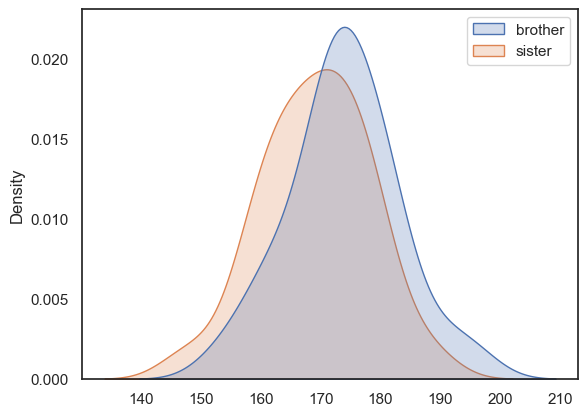

In [29]:
# Your code here to plot the longform data
sns.kdeplot(data=heightsWideform, fill=True)
plt.show()

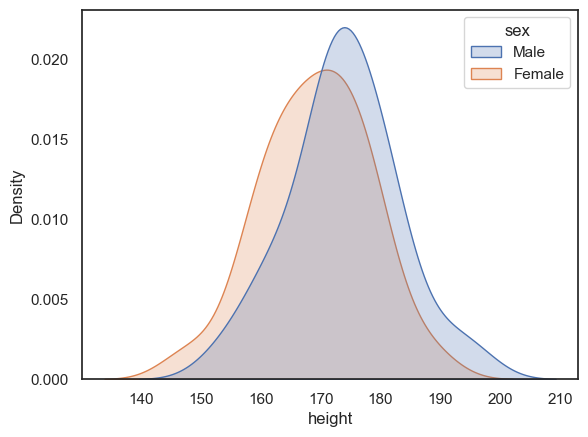

In [30]:
# Your code here to plot the wideform data
sns.kdeplot(data=heightsLongform, x='height', hue='sex', fill=True)
plt.show()

**b. Plot the data as a scatterplot of brother vs sister's height**

*Let's do this for both longform and wideform data. Let's use `sns.regplot()` which adds the best fitting regression line (the straight line that best fits through the data points) - and compare to the line x=y*

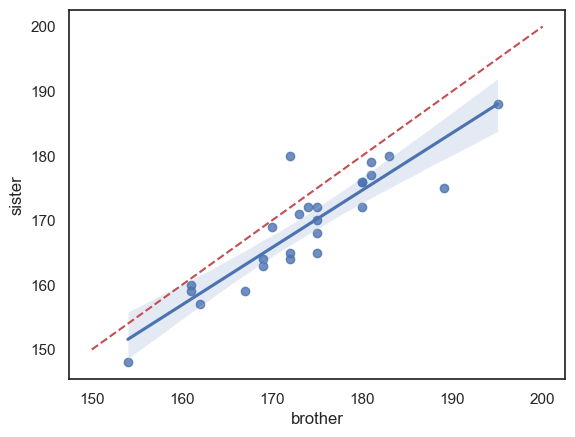

In [31]:
# Wideform version
# use sns.regplot to make a sctterplot with regression line
sns.regplot(data=heightsWideform, x='brother', y='sister')

# add the line x=y as a red dashed line
plt.plot([150,200],[150,200],'r--')
plt.show()

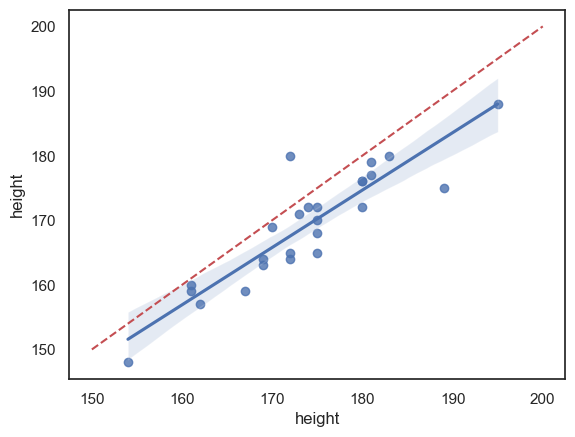

In [32]:
# Longform version
# use sns.regplot to make a sctterplot with regression line
sns.regplot(x=heightsLongform.query('sex=="Male"').height, 
            y=heightsLongform.query('sex=="Female"').height)

# add the line x=y as a red dashed line
plt.plot([150,200],[150,200],'r--')
plt.show()

**c. Get the mean height for brothers and sisters separately**

*Do this for the longform and wideform dataframes*

In [33]:
# Your code to get the mean brother and sister heights from the wideform data
heightsWideform.mean()

brother    173.80
sister     169.16
dtype: float64

In [34]:
# Your code to get the mean brother and sister heights from the wideform data
#EITHER
print(heightsLongform.query('sex=="Male"').height.mean())
print(heightsLongform.query('sex=="Female"').height.mean())
#OR
heightsLongform.groupby('sex').height.mean()

173.8
169.16


sex
Female    169.16
Male      173.80
Name: height, dtype: float64

### Experimental design

**a. Paired design**

*i) What is a *paired* design (also called a *matched-pairs* design)?*

<font color='red'>Your answer here
    
<font color='red'>A design in which each member of group A has a 'pair' in group B, who is matched on factors that could affect the measure of interest but are irrelevant to the hypothesis (eg we match for genetic or lifestyle factors or disease severity when testing a drug vs placebo)

*ii) What are the advantages of a paired design (compared to a independent samples design?)*

<font color='red'>Your answer here
    
<font color='red'>By 'cancelling out' irrelevant factors we become more sensitive to the relevant factor/ experimental manipulation

*iii) In a paired design, we are testing whether the average *difference* withing pairs is significantly different from zero. For example, is the difference between each brother and his own sister reliably positive (brothers are taller than sisters)?*

*Look at the scatterplot above. In this case, why is it particularly helpful to use a* paired *design rather than an independent samples design?*

<font color='red'>Your answer here
    
<font color='red'>A lot of the variance in height is due to the shared effect of familiy, which is irrelevant to our question; the paired design cancels this out.

**b) Repeated measures design**

*A **repeated measures** design is a type of paired design.*

*i) Explain what is the difference between a paired design (in general) and a repeated measures design.*

<font color='red'>Your answer here
    
<font color='red'>Repeated measures uses the same participants twice, rather than different individuals who were matched in some way

*ii) Give an example of a study in which a repeated measures design could be used (ie, 'if we wanted to test xxx, we could use a repeated measures design in which we measure.....')*

<font color='red'>Your answer here
    
<font color='red'>e.g. if we want to test the effect of a drug on blood pressure, we measure blood pressure in the same person on- and off- drug

*iii) What potential pitfalls are there with repeated measures designs? How might they be mitigated?*

<font color='red'>Your answer here
    
<font color='red'>Order effects. Need to counterbalance order of conditions.

**d) Detailed example**

*A researcher hypothesises that men are taller than women:*

$\mathcal{H_o}$: the mean height of men is equal to that of women

$\mathcal{H_a}$: the mean height of men is greater than that of women

*She conducts two permutation tests on the brother-sister data as follows:*

In [35]:
# TEST 1:
def dMeans(x,y):
    return np.mean(x)-np.mean(y)

results1 = stats.permutation_test((heightsWideform.brother, heightsWideform.sister), 
                                   dMeans, permutation_type='independent')
results1

PermutationTestResult(statistic=4.640000000000015, pvalue=0.0806, null_distribution=array([ 2.56,  2.32,  0.48, ...,  1.84,  3.12, -2.16]))

In [36]:
# TEST 2:
def mDiff(x,y):
    return np.mean(x-y)

results2 = stats.permutation_test((heightsWideform.brother, heightsWideform.sister), 
                                   dMeans, permutation_type='samples')
results2

PermutationTestResult(statistic=4.640000000000015, pvalue=0.0004, null_distribution=array([-1.68, -2.88, -0.48, ...,  2.56,  0.56,  0.24]))

**i) Which test was correct and why?**

<font color='red'>Your answer here
    
<font color='red'>Test 2 as it is a paired test

**ii) The p-value for Test 2 is smaller, why?**

<font color='red'>Your answer here
    
<font color='red'>In test 1 we didn't make use of the paired nature of the data, therefore between-families variation was not controlled for

**iii) In each case we specify a function to get the difference of means - what is the difference between `dMeans()` and `mDiff()`?**

<font color='red'>Your answer here
    
<font color='red'>mDiff gets the mean difference within each pair and averages those differences; dMeans gets the mean for each group and finds the difference

**iv) The Test Statistic is the same for tests 1 and 2. Can you explain why?**

<font color='red'>Your answer here
    
<font color='red'>The mean difference is the same as the difference of means for any given dataset

**v) The null distribution for tests 1 and 2 is quite different. Can you explain why?**

The null distributions are plotted for you here to help:

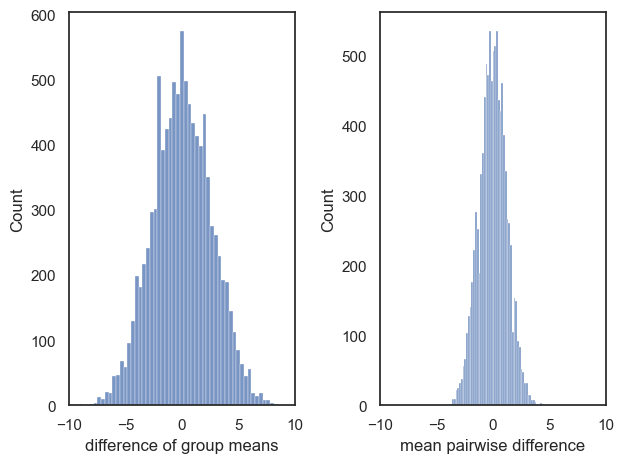

In [37]:
plt.subplot(1,2,1)
sns.histplot(results1.null_distribution)
plt.xlim([-10,10])
plt.xlabel('difference of group means')

plt.subplot(1,2,2)
sns.histplot(results2.null_distribution)
plt.xlim([-10,10])
plt.xlabel('mean pairwise difference')

plt.tight_layout()

<font color='red'>Your answer here
    
<font color='red'>For the paired test the range of possible values of mDiff is smaller; the maximum would be if every brother was taller than his sister (even so the height difference within families is not that great). 
    
<font color='red'>For the unpaired test a greater range of dMeans is possible; the maximum would be if all the men were taller than all the women. This would be quite a bibg difference as the tallest people/fammilies are a lot taller than the shortest people/families.

### One vs Two-tailed tests

*If we know the direction in which we expect an effect (men are taller than women) we can run a one-tailed test. Otherwise we must run a two-tailed test.*

*Load the following (made-up) data comparing the heights of female Psychology and female BMS students:*

In [38]:
heights = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/PsyBMSheights.csv')

*A researcher hypothesises that BMS students are taller than psychology students. She limits her analysis to female students:*
    
$\mathcal{H_o}$ The mean height of (female) psychology and BMS students are the same

$\mathcal{H_a}$ The mean height of (female) psychology students is less than the mean height of BMS students

*She decides to test at the $\alpha=0.05$ level*

**a) Is this a one or two tailed test?**

<font color='red'>Your answer here
    
<font color='red'>One because the direction is specified

**b) What's wrong in the following example?**

The researcher used a t-test to test her hypothesis as follows

In [39]:
stats.ttest_ind(heights.query('subject=="BMS"').height, heights.query('subject=="Psychology"').height, alternative='less')

TtestResult(statistic=1.823852779167176, pvalue=0.9627982812018988, df=48.0)

What has she done wrong?

<font color='red'>Your answer here
    
<font color='red'>She has done a one tailed test in the wrong direction, testing for BMS less than PSY
                                                                                             
<font color='red'>This is a common error so if you ever get a p value of 0.95 or so check that you haven't done this!

**c) Correct the mistake**

*Re-run the test, correcting the researcher's mistake*

In [40]:
# Your code here
stats.ttest_ind(heights.query('subject=="BMS"').height, heights.query('subject=="Psychology"').height, alternative='greater')

TtestResult(statistic=1.823852779167176, pvalue=0.03720171879810118, df=48.0)

**d) Run a two-tailed test**

*Say the researcher had no a-priori hypothesis about which subject hahs taller students. Then she should have stated her hypotheses as follows, and run a two-tailed test*


$\mathcal{H_o}$ The mean height of (female) psychology and BMS students are the same

$\mathcal{H_o}$ The mean height of (female) psychology students is different from mean height of BMS students

*She still wishes to test at the $\alpha=0.05$ level**

**Run the test yourself**

In [41]:
# Your code here
stats.ttest_ind(heights.query('subject=="BMS"').height, heights.query('subject=="Psychology"').height)

TtestResult(statistic=1.823852779167176, pvalue=0.07440343759620235, df=48.0)

*i) How does the $p$-value from the two tailed test relate to that of (correct version of) the one-tailed test above?*

<font color='red'>Your answer here
    
<font color='red'>The value for the two-tailed test is double that for the one tailed test because we could the area in the 'tail' at both ends of the null distribution

*ii) The two-tailed test is not significant at the 5% level whilst the one-tailed test was significant. Can you explain why?*
* Key terms for your answer are the *critical region* of the test and the *critical value* or *cut-off value*
* These were introduced in lectures but if you don't remember them, a quick good brings up several tutorials

<font color='red'>In the two-tailed test the critical region is shared between obth tails of the null distribution (each get 2.5%) so the critical or cutoff value needs to be more extreme. Thus the two-tailed test uses a harsher or momre stringent criterion for rejecting the null than in the one-tailed test (but will find a significant result if either group has a larger mean, not just one direction).

**e) "Peeking"**

*Why did the researcher think that BMS students would be taller in the first place? Because when she plotted the data to check for outliers (which is indeed correct procedure), she noticed that the BMS students looked taller:*

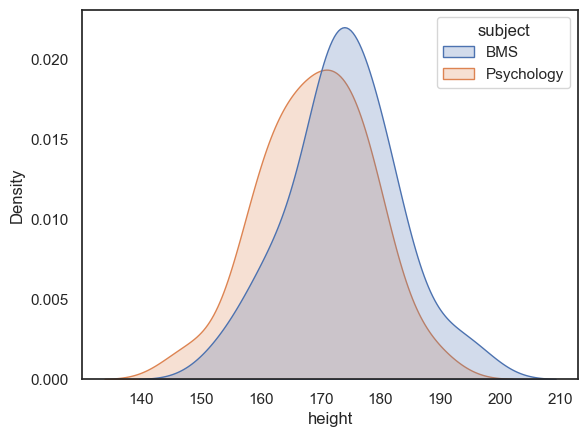

In [42]:
sns.kdeplot(data=heights, x='height', hue='subject', fill=True)
plt.show()

If the psychology students had looked taller, she would have done a one-tailed test in the other direction.

Using this approach (sometiems called "peeking" at the data) is wrong, because means that the chance of getting a 'significant' result if the null was true (the false positive rate) is double.

Can you explain why?

<font color='red'>Your answer here
    
<font color='red'>We effectively now have a 5% critical region at each tail of the null distribution (as we would have picked whichever tail looked more likely to 'work') - so the total critical region is 10%

*It is not wrong to inspect your data before running a test, but **your hypotheses (and in particular justification for a one-tailed test) should reflect predictions you would be able to make without seeing the particular sample of data**.*